In [24]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image


In [25]:
# Getting names of the classes we have
data1_directory = pathlib.Path('data/raw/Fruits Classification/test')
class_names = [item.name for item in data1_directory.glob('*')][:5]
print(class_names)

['Mango', 'Banana', 'Strawberry', 'Apple', 'Grape']


In [26]:
# Getting names of the classes we have
data2_directory = pathlib.Path('data/raw/Fruits Classification/train')
class_names = sorted([item.name for item in data1_directory.glob('*')][:5])
print(class_names)

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']


In [27]:
test_apple_dir = '/kaggle/input/fruits-classification/Fruits Classification/test/Apple' 
test_banana_dir = '/kaggle/input/fruits-classification/Fruits Classification/test/Banana'
test_grape_dir = '/kaggle/input/fruits-classification/Fruits Classification/test/Grape'
test_mango_dir = '/kaggle/input/fruits-classification/Fruits Classification/test/Mango'
test_strawberry_dir = '/kaggle/input/fruits-classification/Fruits Classification/test/Strawberry'

In [28]:
train_apple_dir = '/kaggle/input/fruits-classification/Fruits Classification/train/Apple' 
train_banana_dir = '/kaggle/input/fruits-classification/Fruits Classification/train/Banana'
train_grape_dir = '/kaggle/input/fruits-classification/Fruits Classification/train/Grape'
train_mango_dir = '/kaggle/input/fruits-classification/Fruits Classification/train/Mango'
train_strawberry_dir = '/kaggle/input/fruits-classification/Fruits Classification/train/Strawberry'

In [29]:
# num_apple_images = len(os.listdir(test_apple_dir))
# num_banana_images = len(os.listdir(test_banana_dir))
# num_grape_images = len(os.listdir(test_grape_dir))
# num_mango_images = len(os.listdir(test_mango_dir))
# num_strawberry_images = len(os.listdir(test_strawberry_dir))
# print(f'Number of apple image: {num_apple_images}')
# print(f'Number of banana images: {num_banana_images}')
# print(f'Number of grape image: {num_grape_images}')
# print(f'Number of mango images: {num_mango_images}')
# print(f'Number of strawberry image: {num_strawberry_images}')

In [30]:
# num_apple_images1 = len(os.listdir(train_apple_dir))
# num_banana_images1 = len(os.listdir(train_banana_dir))
# num_grape_images1 = len(os.listdir(train_grape_dir))
# num_mango_images1 = len(os.listdir(train_mango_dir))
# num_strawberry_images1 = len(os.listdir(train_strawberry_dir))
# print(f'Number of apple image: {num_apple_images}')
# print(f'Number of banana images: {num_banana_images}')
# print(f'Number of grape image: {num_grape_images}')
# print(f'Number of mango images: {num_mango_images}')
# print(f'Number of strawberry image: {num_strawberry_images}')

In [31]:
# Defining data generator withour Data Augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory(data1_directory, 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory(data1_directory, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 80 images belonging to 5 classes.
Found 20 images belonging to 5 classes.


In [32]:
# Defining data generator withour Data Augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory(data2_directory, 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory(data2_directory, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 7760 images belonging to 5 classes.
Found 1940 images belonging to 5 classes.


In [33]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [34]:
def plot_random_images():
    """
    Plots 20 Random Images from the dataset
    """
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 10))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()       
    plt.show()

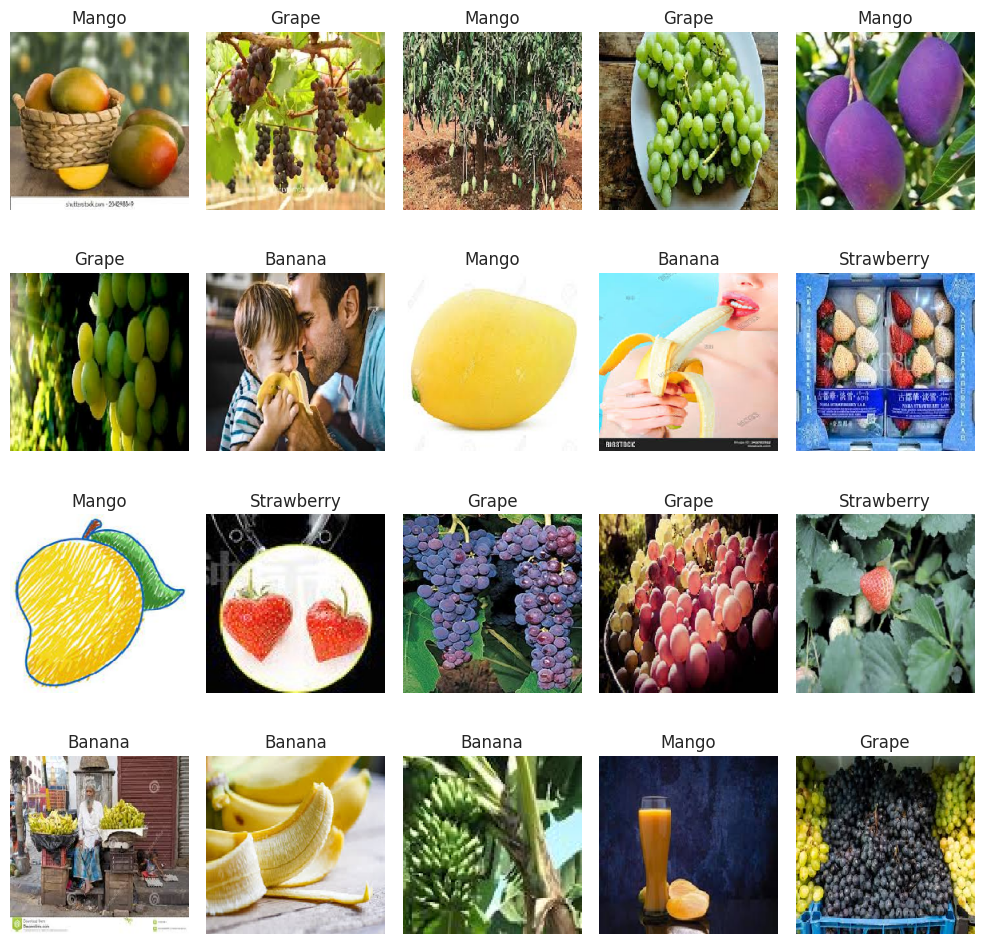

In [35]:
plot_random_images()

In [36]:
train_data, val_data

(<keras.src.preprocessing.image.DirectoryIterator at 0x7f5bd7d56fd0>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7f5bd7cb2550>)

In [37]:
model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(5, activation = 'softmax'),
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [39]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3,
                              verbose = 1, factor = 0.5, min_lr = 0.00001)

In [40]:
classifier = model.fit(train_data, batch_size = 32, 
                                 epochs = 5, 
                                 validation_data = val_data, 
                                 verbose = 1,
                                 callbacks = [reduce_lr])

Epoch 1/5
243/243 [==============================] - 194s 795ms/step - loss: 1.3245 - accuracy: 0.5034 - val_loss: 1.1855 - val_accuracy: 0.5155 - lr: 0.0010
Epoch 2/5
243/243 [==============================] - 188s 774ms/step - loss: 0.9399 - accuracy: 0.6300 - val_loss: 1.1073 - val_accuracy: 0.5428 - lr: 0.0010
Epoch 3/5
243/243 [==============================] - 183s 753ms/step - loss: 0.6099 - accuracy: 0.7762 - val_loss: 1.1411 - val_accuracy: 0.5536 - lr: 0.0010
Epoch 4/5
243/243 [==============================] - 183s 754ms/step - loss: 0.2940 - accuracy: 0.9000 - val_loss: 1.6345 - val_accuracy: 0.5495 - lr: 0.0010
Epoch 5/5
243/243 [==============================] - 183s 753ms/step - loss: 0.1344 - accuracy: 0.9608 - val_loss: 1.8718 - val_accuracy: 0.5598 - lr: 0.0010


In [41]:
model.evaluate(val_data)

61/61 [==============================] - 8s 132ms/step - loss: 1.8718 - accuracy: 0.5598


[1.8718374967575073, 0.5597938299179077]

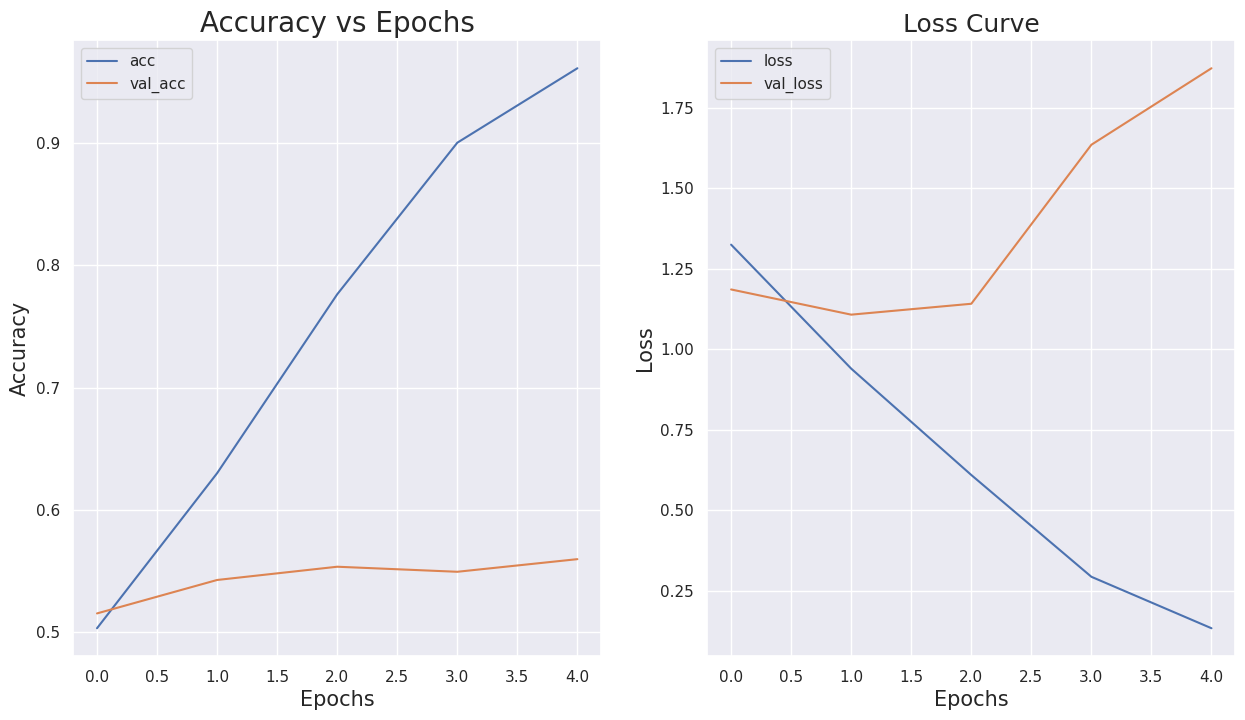

In [42]:
def model_performance_graphs():
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label = 'acc')
    axes[0].plot(classifier.epoch, classifier.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()
    
model_performance_graphs()

In [43]:
model.save('out/models/model.h5')

In [44]:
loaded_model = tf.keras.models.load_model('out/models/model.h5')

In [45]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0
    
    return img_preprocessed

In [48]:
img_path = "data/raw/Fruits Classification/test/Banana/Banana (3939).jpeg"
img = preprocess_images(img_path)
prediction = loaded_model.predict(img)

predicted_class_index = np.argmax(prediction)

class_labels = ['apple' , 'banana' , 'grape' , 'mango' , 'strawberry']  
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 [==============================] - 0s 24ms/step
Predicted class: banana
